In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

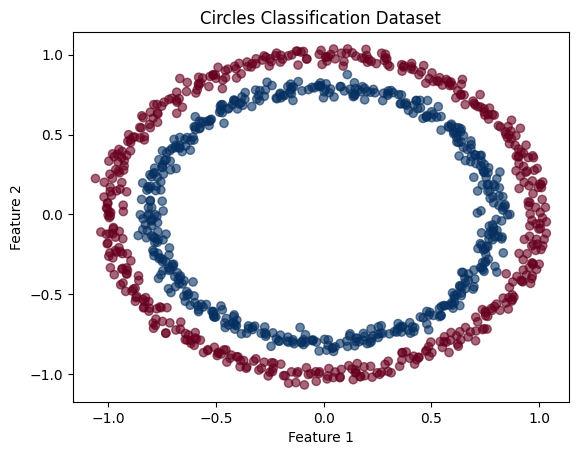

In [2]:
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu, alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circles Classification Dataset')
plt.show()

In [3]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Reshape y for binary classification
y = y.unsqueeze(1)

**Split into train and test**

In [4]:
dataset = TensorDataset(x, y)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

**Using torch.nn.Sequential**

In [5]:
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

**Building Classification Model**

In [6]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x


model = BinaryClassifier()

**Loss, Optimizer, and Evaluation Functions**

In [7]:
# Loss function for binary classification
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Logits

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc